In [ ]:
!nvidia-smi

Tue Jun 24 12:34:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/data.zip /content

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip -q /content/data.zip -d /content/custom_data

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

--2025-06-24 12:36:25--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-06-24 12:36:25 (52.7 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]



In [ ]:
!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 85
Number of annotation files: 85
Images moving to train: 76
Images moving to validation: 9


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 995.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 85
names:
- bottle 1
- bottle 10
- bottle 11
- bottle 12
- bottle 13
- bottle 14
- bottle 15
- bottle 16
- bottle 17
- bottle 18
- bottle 19
- bottle 20
- bottle 21
- bottle 22
- bottle 23
- bottle 24
- bottle 25
- bottle 26
- bottle 27
- bottle 28
- bottle 29
- bottle 30
- bottle 31
- bottle 32
- bottle 33
- bottle 34
- bottle 35
- bottle 36
- bottle 37
- bottle 38
- bottle 39
- bottle 4
- bottle 40
- bottle 41
- bottle 42
- bottle 43
- bottle 44
- bottle 45
- bottle 46
- bottle 47
- bottle 48
- bottle 49
- bottle 5
- bottle 50
- bottle 51
- bottle 52
- bottle 53
- bottle 54
- bottle 55
- bottle 56
- bottle 57
- bottle 58
- bottle 59
- bottle 6
- bottle 60
- bottle 61
- bottle 62
- bottle 63
- bottle 64
- bottle 65
- bottle 66
- bottle 67
- bottle 68
- bottle 69
- bottle 7
- bottle 70
- bottle 71
- bottle 72
- bottle 73
- bottle 74
- bottle 75
- bottle 76
- bot

In [ ]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 162MB/s]
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, i

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,445,695 parameters, 0 gradients, 21.5 GFLOPs

image 1/9 /content/data/validation/images/23a8f263-WhatsApp_Image_2025-06-17_at_12.54.17_PM_22.jpeg: 640x480 (no detections), 46.9ms
image 2/9 /content/data/validation/images/30c65d47-WhatsApp_Image_2025-06-17_at_12.54.16_PM_44.jpeg: 640x480 (no detections), 12.5ms
image 3/9 /content/data/validation/images/4f908671-WhatsApp_Image_2025-06-17_at_12.54.16_PM_6.jpeg: 640x480 (no detections), 12.4ms
image 4/9 /content/data/validation/images/50a6fd6c-WhatsApp_Image_2025-06-17_at_12.54.17_PM_4.jpeg: 640x480 (no detections), 12.5ms
image 5/9 /content/data/validation/images/5bdd9bf1-WhatsApp_Image_2025-06-17_at_12.54.17_PM_15.jpeg: 640x480 (no detections), 12.5ms
image 6/9 /content/data/validation/images/64c15507-WhatsApp_Image_2025-06-17_at_12.54.17_PM_16.jpeg: 640x480 (no detections), 12.5ms
image 7/9 /content/data/validation/i

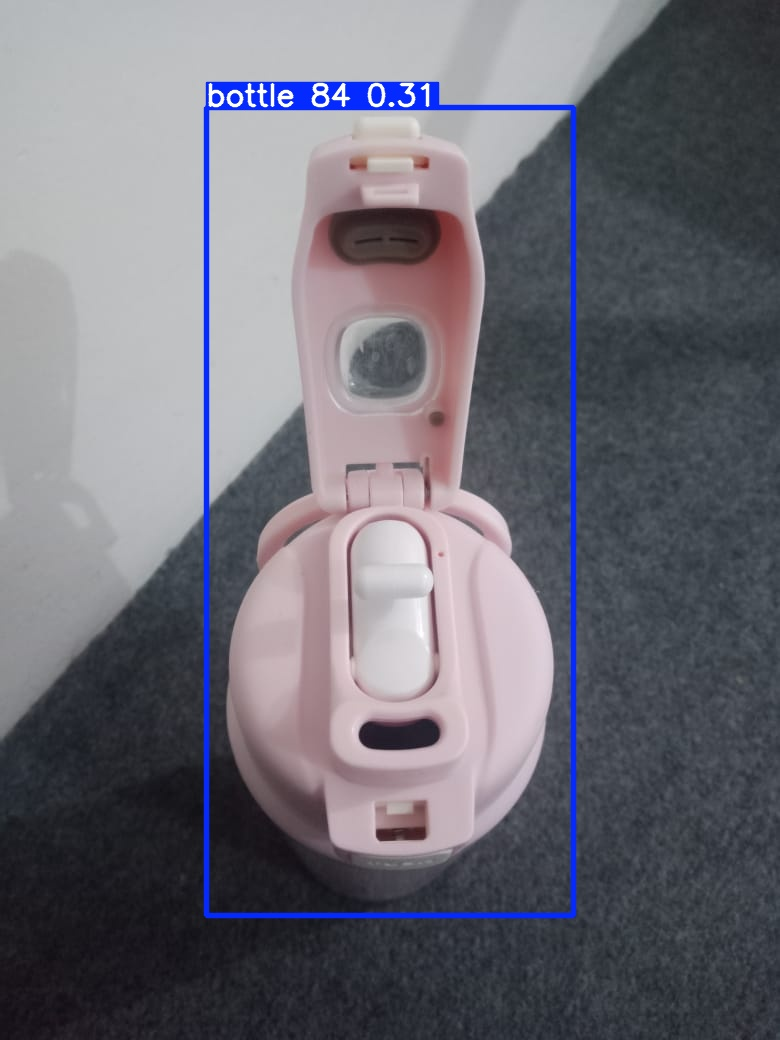

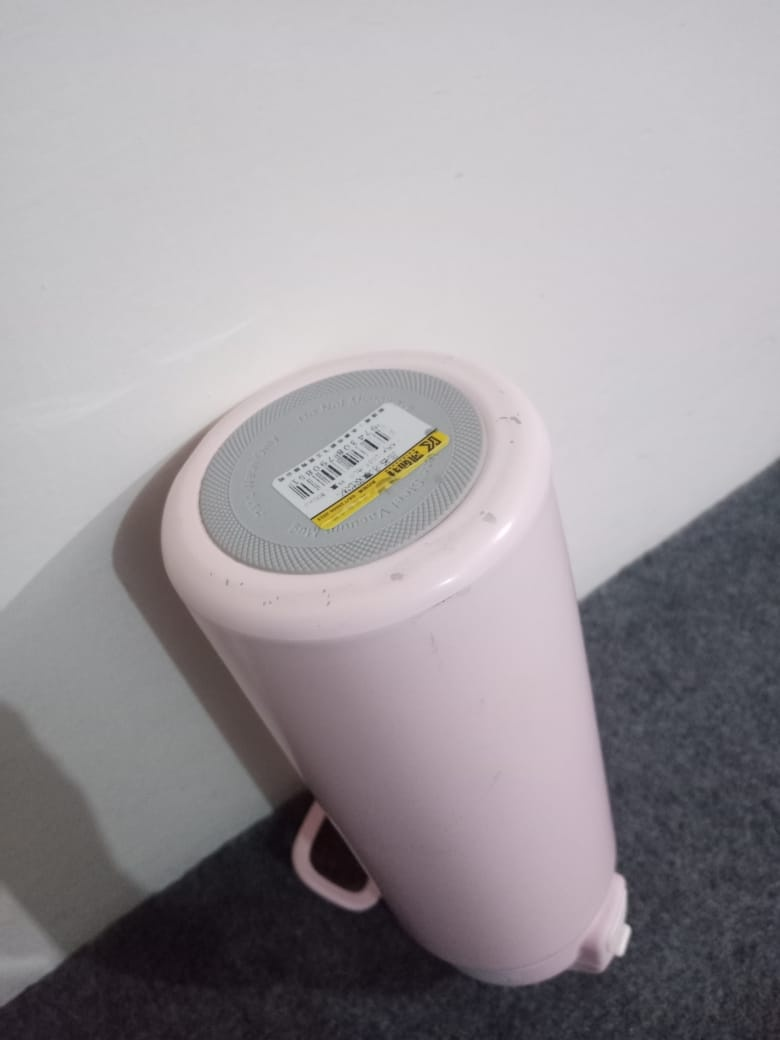

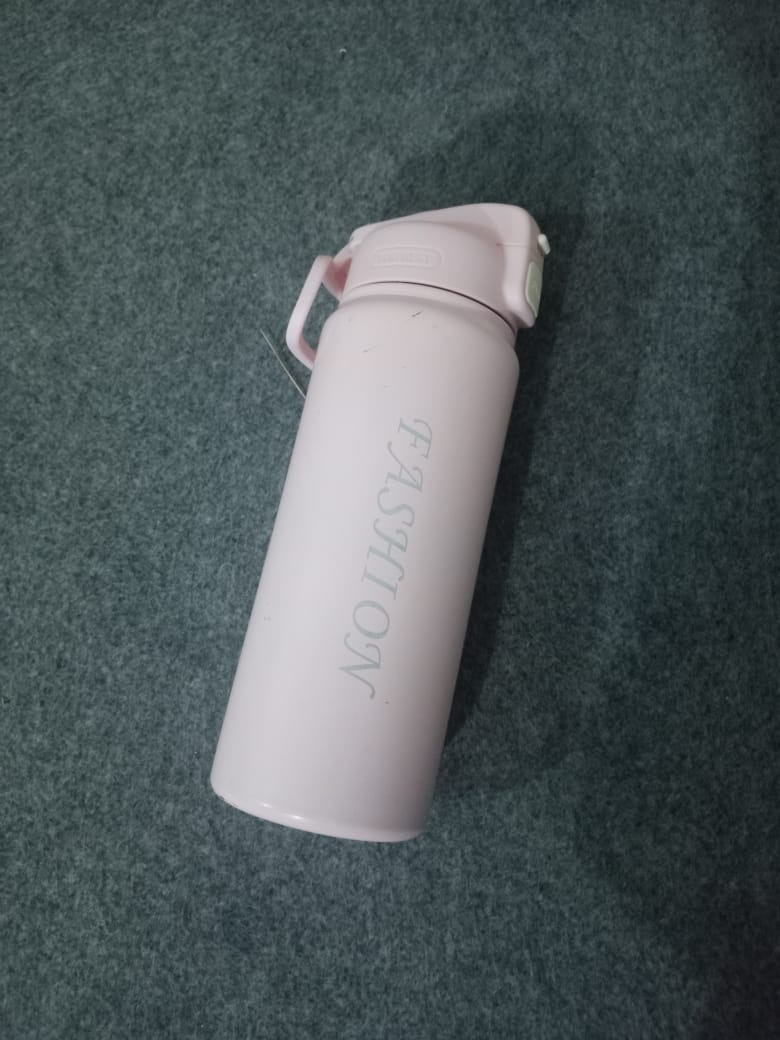

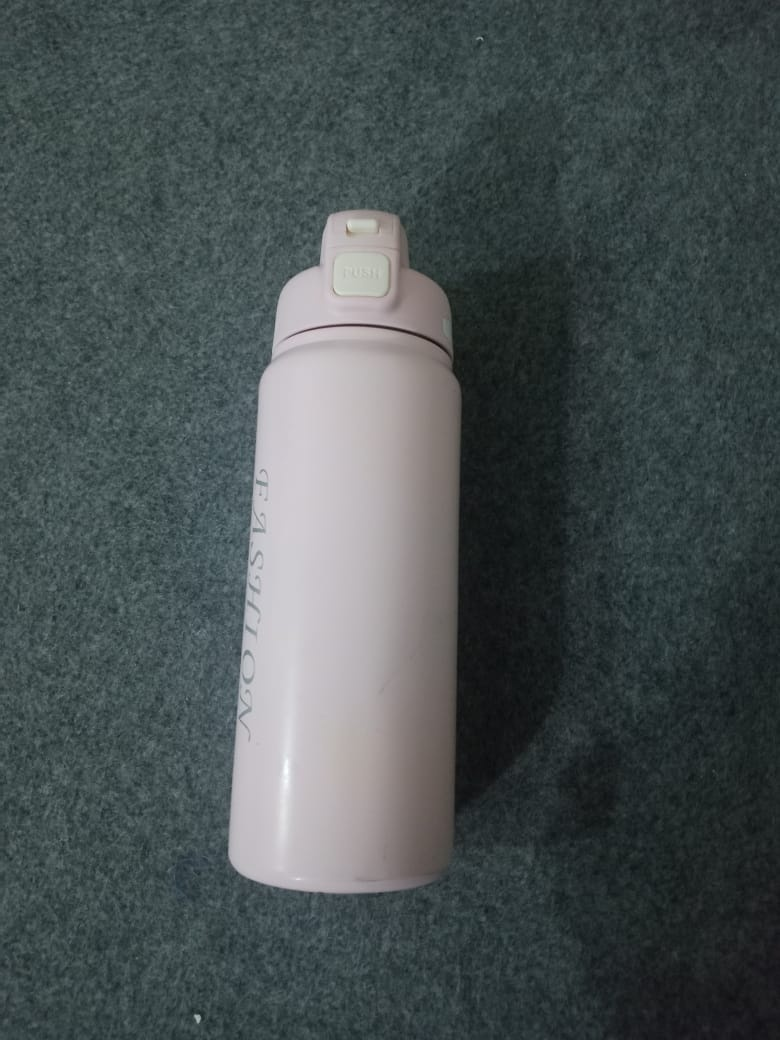

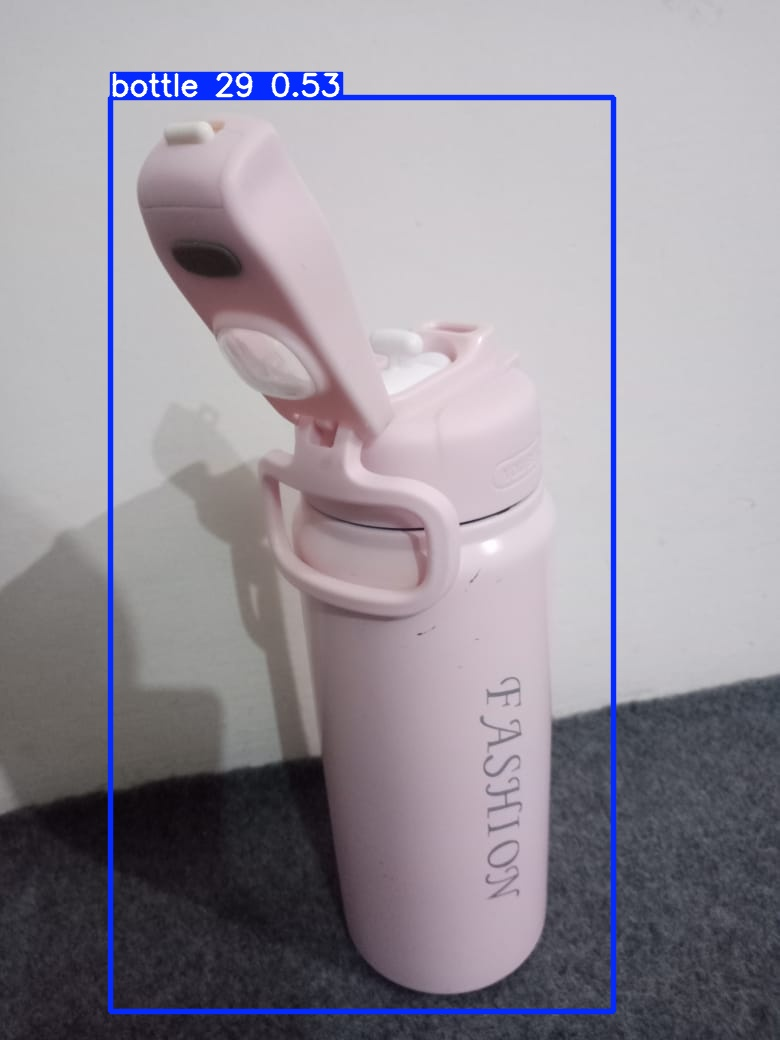

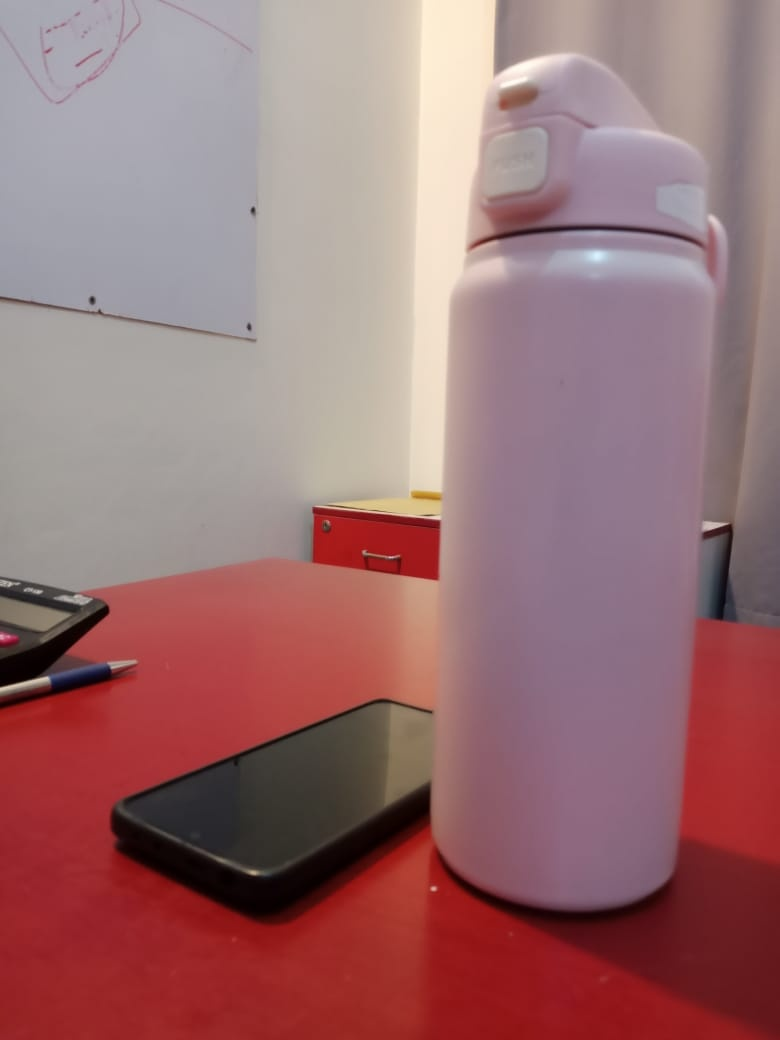

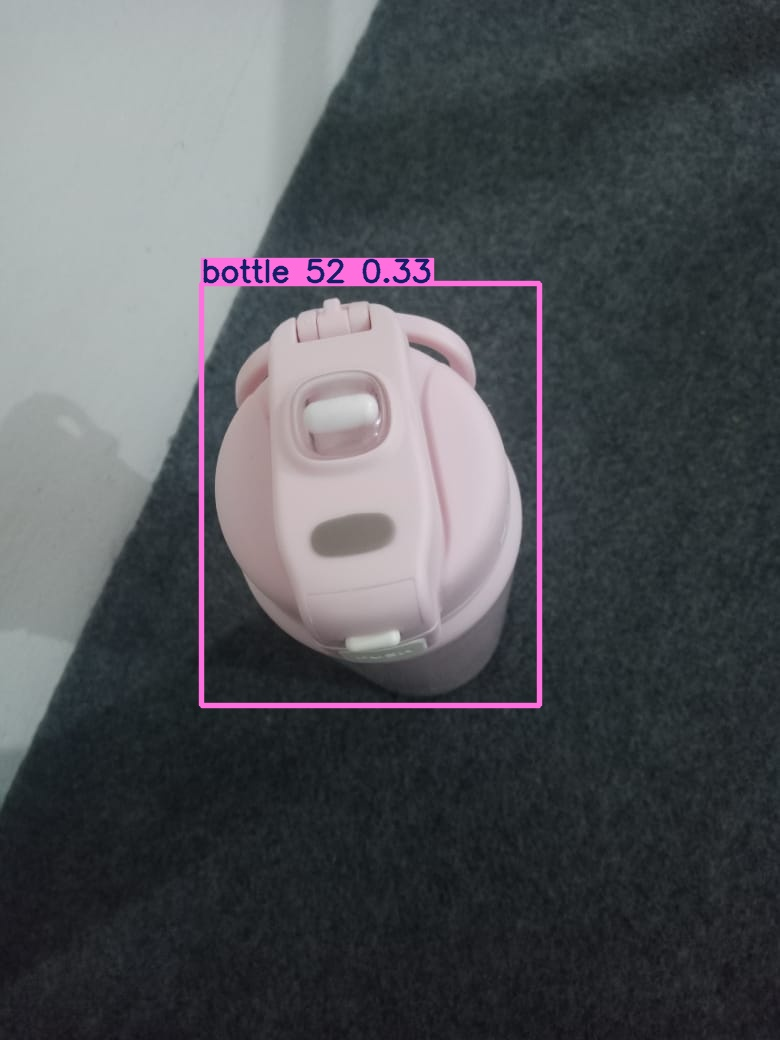

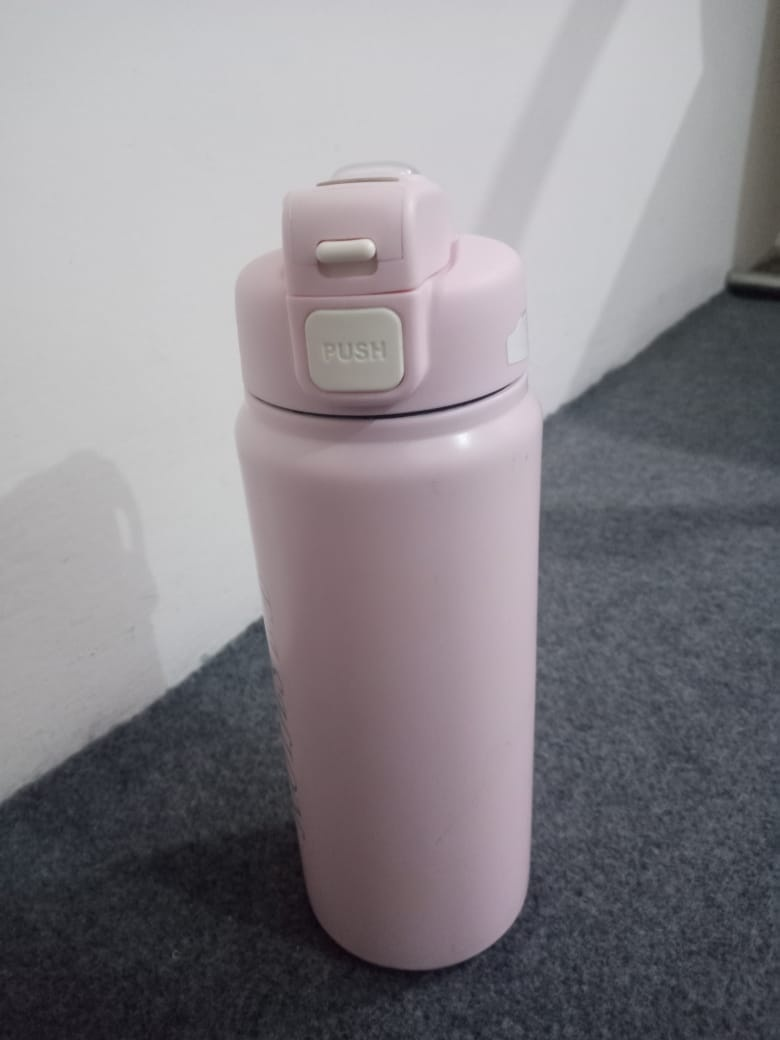

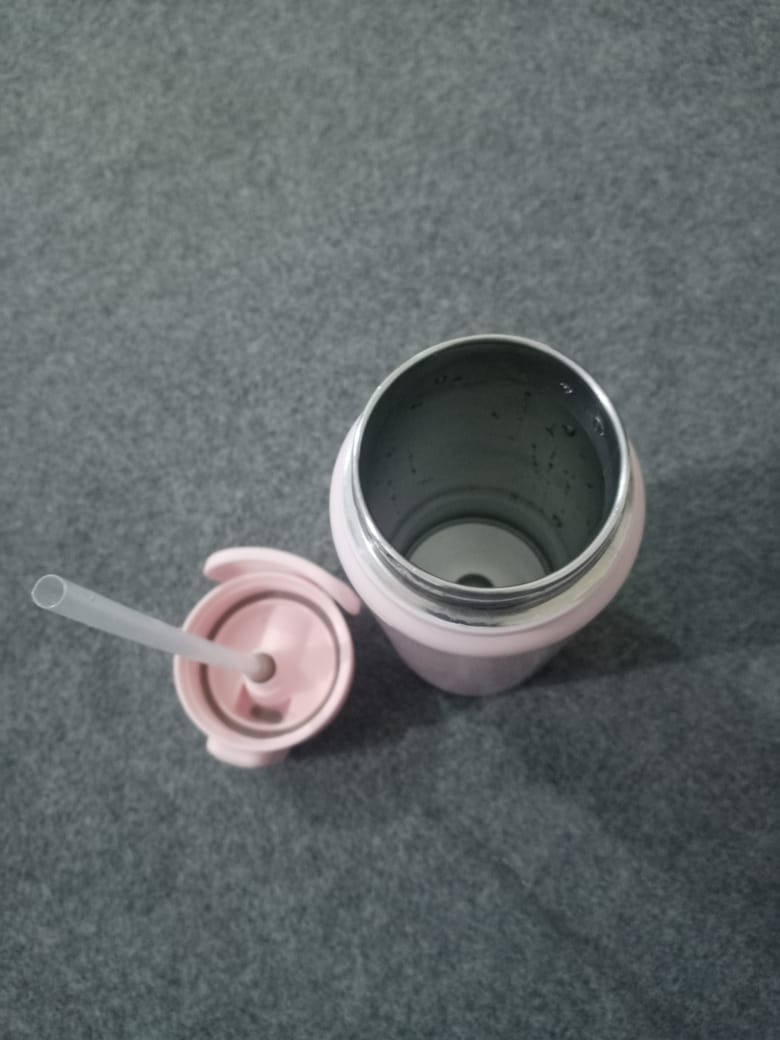

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix_normalized.png (deflated 36%)
  adding: train/R_curve.png (deflated 24%)
  adding: train/labels.jpg (deflated 44%)
  adding: train/train_batch2.jpg (deflated 6%)
  adding: train/val_batch0_labels.jpg (deflated 12%)
  adding: train/results.csv (deflated 62%)
  adding: train/results.png (deflated 7%)
  adding: train/train_batch1.jpg (deflated 6%)
  adding: train/train_batch250.jpg (deflated 18%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch0.jpg (deflated 6%)
  adding: train/train_batch252.jpg (deflated 13%)
  adding: train/P_curve.png (deflated 22%)
  adding: train/F1_curve.png (deflated 26%)
  adding: train/PR_curve.png (deflated 25%)
  adding: train/labels_correlogram.jpg (deflated 50%)
  adding: train/confusion_matrix.png (deflated 37%)
  adding: train/train_batch251.jpg (deflated 14%)
  adding: train/val_batch0_pred.jpg (deflated 12%)
  adding: t

In [ ]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>